# The Relationship Between Tree Diameter and Growth Environment

## Introduction

This project involves using the diameter of a common tree species in Vancouver, used to compare different streets. These streets are where some of us as group members reside, so we were interested in determining what would be the diameter of this common tree species which is very populated here in Vancouver, BC.

#### Background Information

The diameter of a tree’s trunk reveals the growth of a tree and is closely relative to the surrounding environment. Trees need water, sunlight and carbon dioxide to produce nutrients for themselves so that they can use the chemical energy to grow in height and girth(diameter). The growth of the trunk's diameter usually happens after the primary growth. For a tree, primary growth is responsible for the height of the tree and the depth of its root (Cavallo-Medve, et al., 1971). Once  the primary growth has occurred, the secondary growth takes place. The secondary growth will develop  the width (diameter) of a tree’s trunk. In this research, we are comparing the same kind of tree (Magnolia) on different streets, aiming to observe whether there exists a potential environmental influence on the trees. According to Berlyn (2022), “Tree height is closely associated with the quality of the site on which the tree is growing (i.e., the climate, soil topography, and biota), radial growth is tied more to the weather conditions of the current year.

#### Motivation

This report can be used by city officials to determine if there are reasons that affect tree growth based on its diameter. From the data, we can see if there are ways to make tree growth more consistent (determining if there is enough care being taken to keep the environment green, etc...); however, our plot and estimates are not enough to give to stakeholders, as it's important that we must gather more data, perhaps comparing other streets in Vancouver or using different variables such as neighbourhoods.

#### Our Inferential Research Question

For our inferential research question, our group decided to focus on the following question: "Do the Magnolia trees on Charles street differ in diameter from the diameters of the Magnolia trees on Churchill street? We plan on collecting data from the City of Vancouver Open Data Portal, where we're focusing on the variables of GENUS_NAME, DIAMETER, and STD_STREET. In addition, we plan on having  our population of interest be Magnolia trees on Charles St. and Churchill St (these are streets that some of our group members reside on). For our point estimate, we are doing the mean difference between Magnolia trees’ diameters on Charles St. and Churchill St. For our hypothesis, we have...

Null hypothesis ($H_0$): there is no difference in the trees’ diameter when planting in different streets

Alternate hypothesis ($H_a$): trees’ diameter will be affected when planting in different streets

$H_0\text{: }\mu_1 = \mu_2$

$H_a\text{: }\mu_1 \neq \mu_2$


## Testing

In [17]:
library(tidyverse)
library(cowplot)
library(infer)
library(repr)
library(broom)

options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

The data is loaded from a URL stored in the `url` variable. We mirrored the dataset to our git repository for faster, easier access, organization, and reproducibility. The original is available at [this link](https://opendata.vancouver.ca/explore/dataset/street-trees/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B).

In [18]:
url <- "https://github.com/armanmoztar/stat-201-group7/raw/main/data.csv"

The data is read and filtered to include only the relevant columns and populations.

In [19]:
magnolia_trees <- read_delim(url, delim = ";") |>
    filter(GENUS_NAME == "MAGNOLIA") |>
    select(street = STD_STREET, diameter = DIAMETER) |>
    filter(street %in% c("CHARLES ST", "CHURCHILL ST"))

head(magnolia_trees)

Rows: 149937 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (13): STD_STREET, GENUS_NAME, SPECIES_NAME, CULTIVAR_NAME, COMMON_NAME,...
dbl   (5): TREE_ID, CIVIC_NUMBER, ON_STREET_BLOCK, HEIGHT_RANGE_ID, DIAMETER
date  (1): DATE_PLANTED

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


street,diameter
<chr>,<dbl>
CHURCHILL ST,3
CHURCHILL ST,3
CHURCHILL ST,3
CHURCHILL ST,3
CHURCHILL ST,3
CHURCHILL ST,2


We estimate our population parameter from our sample and present it in a table for each street.

In [20]:
magnolia_tree_means <- magnolia_trees |>
    group_by(street) |>
    summarise(mean = mean(diameter))

magnolia_tree_means

street,mean
<chr>,<dbl>
CHARLES ST,12.338710
CHURCHILL ST,3.744792


The data is presented as a histogram for both streets, with a red line indicating the mean of each, as well as a boxplot.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


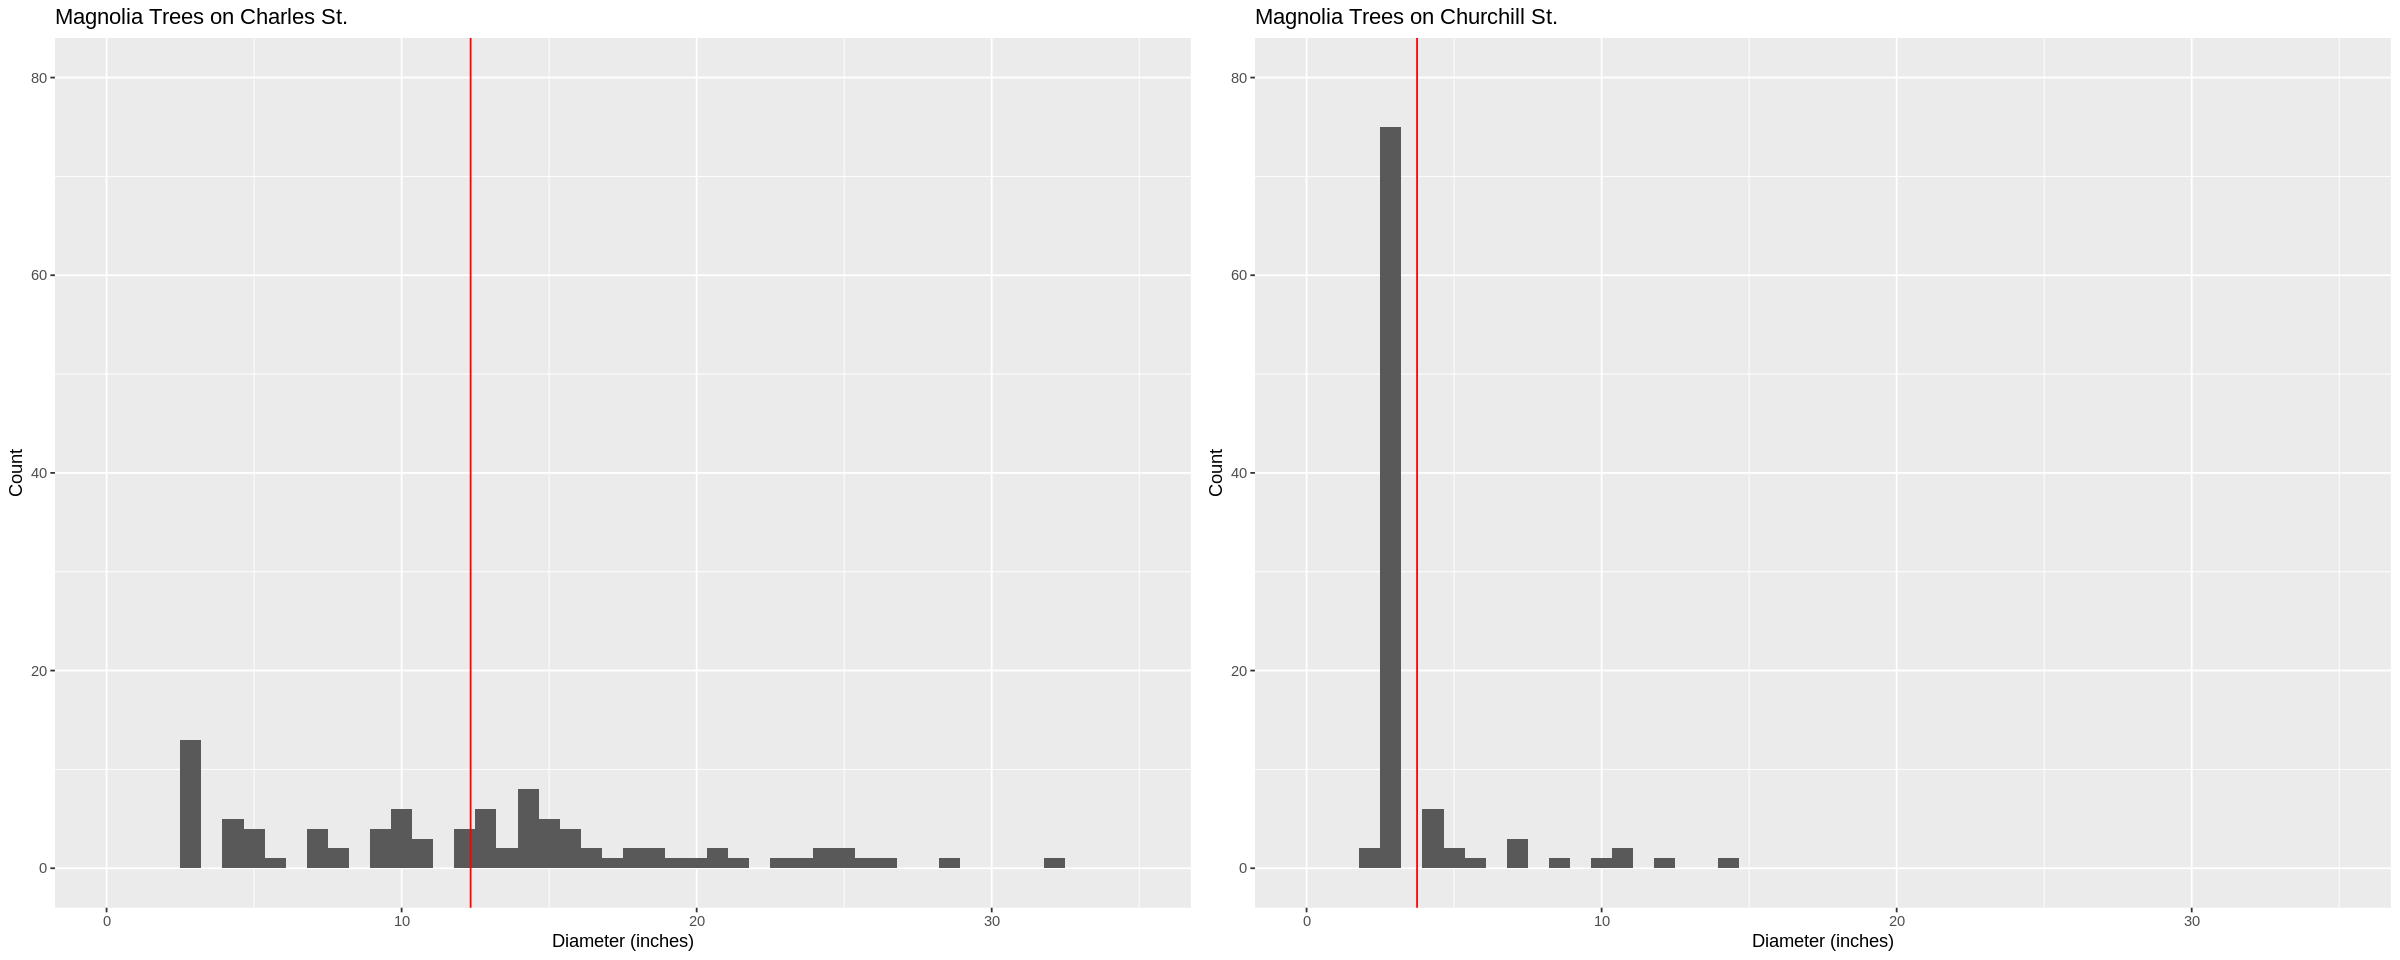

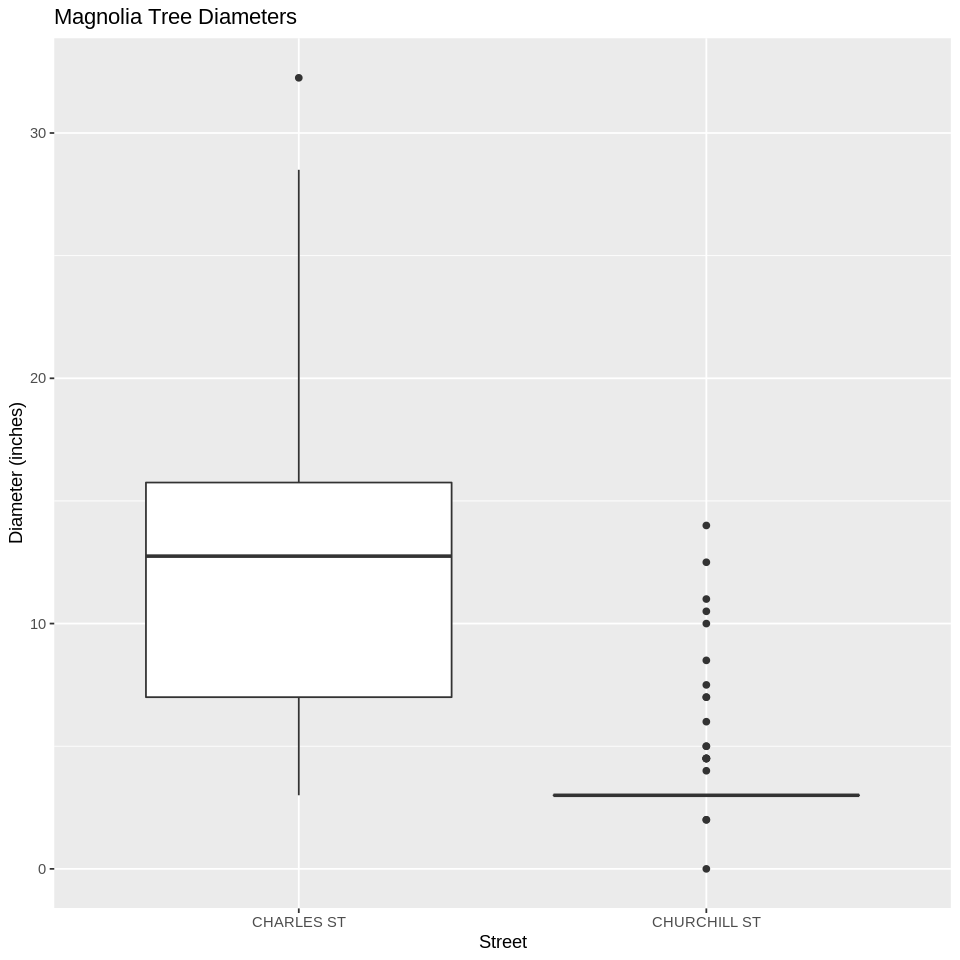

In [32]:
options(repr.plot.width = 20, repr.plot.height = 8)

charles_st_trees_graph <- magnolia_trees |>
    filter(street == "CHARLES ST") |>
    ggplot(aes(x = diameter)) +
    geom_histogram(bins = 50) +
    geom_vline(xintercept = filter(magnolia_tree_means, street == "CHARLES ST")$mean, color = "red") +
    xlim(0, 35) +
    ylim(0, 80) +
    ggtitle("Magnolia Trees on Charles St.") +
    labs(x = "Diameter (inches)", y = "Count")

churchill_st_trees_graph <- magnolia_trees |>
    filter(street == "CHURCHILL ST") |>
    ggplot(aes(x = diameter)) +
    geom_histogram(bins = 50) +
    geom_vline(xintercept = filter(magnolia_tree_means, street == "CHURCHILL ST")$mean, color = "red") +
    xlim(0, 35) +
    ylim(0, 80) +
    ggtitle("Magnolia Trees on Churchill St.") +
    labs(x = "Diameter (inches)", y = "Count")

plot_grid(charles_st_trees_graph, churchill_st_trees_graph)

options(repr.plot.width = 8, repr.plot.height = 8)

box_plot <- magnolia_trees |>
    ggplot(aes(x = street, y = diameter)) +
    geom_boxplot() +
    ggtitle("Magnolia Tree Diameters") +
    labs(x = "Street", y = "Diameter (inches)")

box_plot

To begin our analysis, we first calculate the observed difference in means from our sample.

In [22]:
obs_diff_means <- magnolia_trees |>
    specify(formula = diameter ~ street) |>
    calculate(stat = "diff in means", order = c("CHARLES ST", "CHURCHILL ST"))

pull(obs_diff_means)

[1] 8.593918

Next, we create a null model using 10,000 repetitions. This model is a standard normal distribution centered around a difference in means of 0.

In [23]:
null_diff_means <- magnolia_trees |>
    specify(formula = diameter ~ street) |>
    hypothesise(null = "independence") |>
    generate(type = "permute", reps = 10000) |>
    calculate(stat = "diff in means", order = c("CHARLES ST", "CHURCHILL ST"))

Here, the null model is graphed with a red line representing the p-value. The likelihood of the true mean occurring under the null model would be demonstrated by a shaded red area; however, there is no overlap in our test. Since the observed difference in means has no overlap at all with the null model, we can already infer that the p-value is less than the significance level, and the null hypothesis will be rejected.

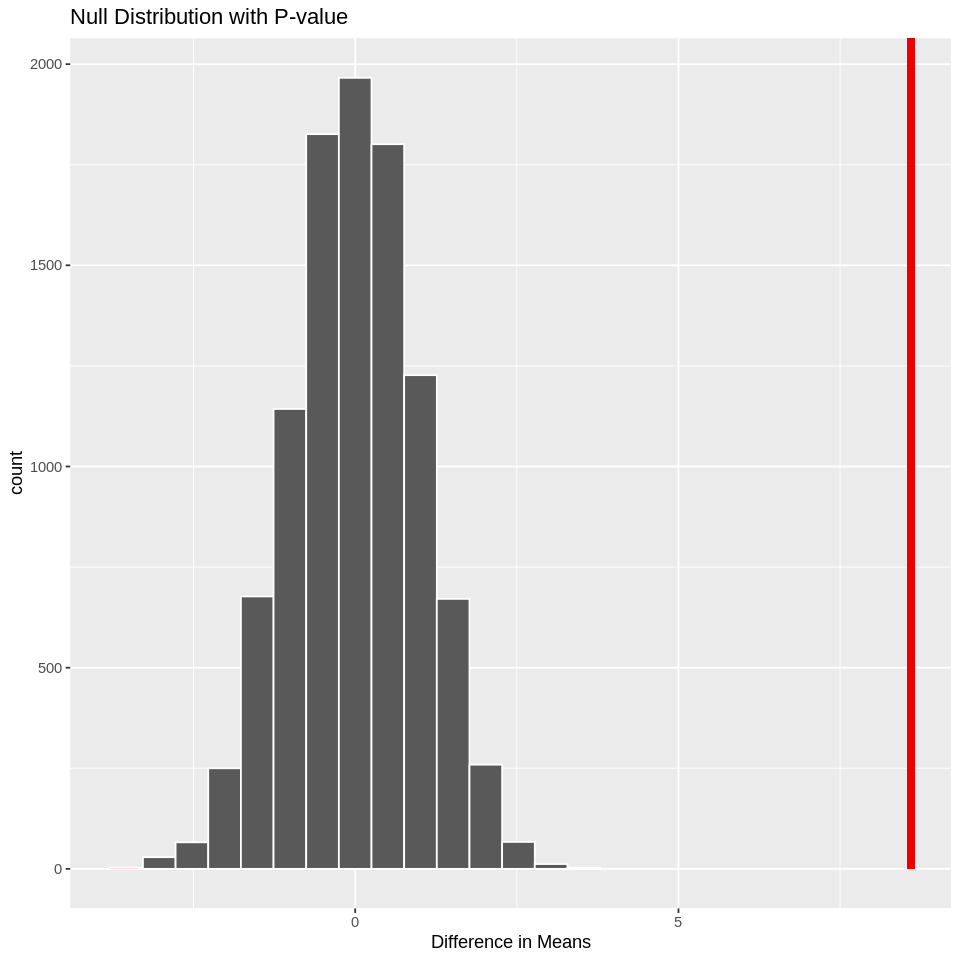

In [24]:
diff_means_graph <- null_diff_means |>
    visualize() +
    shade_p_value(obs_stat = obs_diff_means, direction = "both") +
    ggtitle("Null Distribution with P-value") +
    xlab("Difference in Means")

diff_means_graph

Taking the p-value from our simulated null model, we find it to equal 0 and therefore reject the null hypothesis that the difference in means is 0.

In [25]:
p_value_diff_means <- null_diff_means |>
    get_p_value(obs_stat = obs_diff_means, direction = "both")

pull(p_value_diff_means)

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


[1] 0

To further confirm our data, we will determine a 95% confidence interval through bootstrapping. Here we use bootstrapping on the difference in means with 10,000 repetitions.

In [26]:
bootstrap_diff_means <- magnolia_trees |>
    specify(formula = diameter ~ street) |>
    generate(type = "bootstrap", reps = 10000) |>
    calculate(stat = "diff in means", order = c("CHARLES ST", "CHURCHILL ST"))

Taking a 95% confidence interval from the bootstrap distribution, the lower and upper values of the interval are as follows.

In [27]:
ci_diff_means <- bootstrap_diff_means |>
    get_ci(level = 0.95, type = "percentile")

ci_diff_means

lower_ci,upper_ci
<dbl>,<dbl>
7.137931,10.08909


Finally, we graph the bootstrap distribution of the difference in means as well as the confidence interval. From this graph, we can infer that since the confidence interval does not contain a difference in means of 0, we are 95% confident the true difference in means cannot be 0.

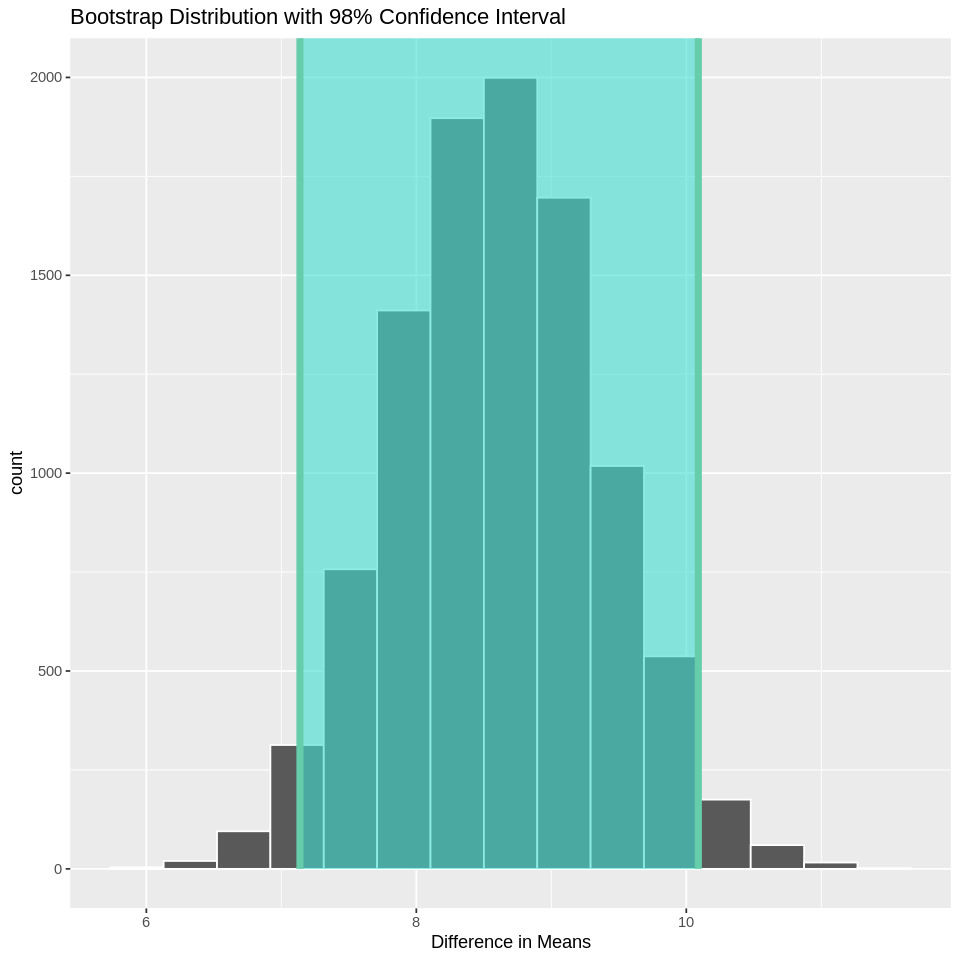

In [28]:
bootstrap_graph <- bootstrap_diff_means |>
    visualise() +
    shade_ci(endpoints = ci_diff_means) +
    ggtitle("Bootstrap Distribution with 98% Confidence Interval") +
    xlab("Difference in Means")

bootstrap_graph

To confirm our previous findings, we conduct a two-sample t-test as confirmation. This test reports a p-value < 0.05, and a similar confidence interval to the one generated by the bootstrap distribution.

In [29]:
t.test(formula = diameter ~ street,
       data = magnolia_trees,
       alternative = "two.sided") |>
    tidy()

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
8.593918,12.33871,3.744792,11.35304,3.371162e-20,109.2151,7.09366,10.09418,Welch Two Sample t-test,two.sided


## Results

In this project, we use two methods to discover whether there is a difference in tree diameters between two streets. The first method is both a simulation-based and theory-based hypothesis test to determine if the sample means of the two groups are the same. To perform the hypothesis test, we filter our sample into two groups, one of Magnolia trees on Charles St., and one of the same on Churchill St. These two populations are independent, even though the trees are the same species.

First, we will graph a boxplot to get an idea of the shape of our data. Here, we can immediately see that the two samples have different means. We compute the means of the two populations and can see a difference of $12.338710 - 3.744792 = 8.593918$. At least in our sample, the two streets have completely different means and show that Charles St. has many thick trees compared to thinner trees on Churchill St. In summary, this initial step indicates that the diameters of Magnolia trees on Charles St. differ from those planted on Churchill St. However, the above steps only provide us with an estimate applicable to only our sample. To answer our research question, "Do the Magnolia trees on Charles St. differ in diameter from the Magnolia trees on Churchill St.?”, we need to conduct a hypothesis test.

This is an independent two-sample hypothesis test. We will go about testing the hypothesis using both a simulation and a t-test. The t-test is applicable here as the entire population of trees should follow a normal distribution, and each of our samples have a size greater than 30.

- **Null Hypothesis** ($H_0$): The mean diameter of Magnolia trees is the same on Charles St. and Churchill St.
- **Alternate Hypothesis** ($H_a$): The mean diameter of Magnolia trees is different between Charles St. and Churchill St.

$$
H_0\text{: } \mu_1 = \mu_2\\
H_a\text{: } \mu_1 \neq \mu_2
$$

With the following variables:
- $\mu_1$ — Mean of Magnolia tree diameters on Charles St.
- $\mu_2$ — Mean of Magnolia tree diameters on Churchill St.


Using the following test statistic,

$$
\frac{\overline{\mu_1} - \overline{\mu_2}}{\sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}}
$$

the data will follow a t-distribution approximately modelled by the following formula if $H_0$ is true:

$$
\frac{(\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2})^2}{\frac{{s_1}^4}{{n_1}^2 (n_1 - 1)} + \frac{{s_2}^4}{{n_2}^2 (n_2 - 1)}}
$$


Then, we can calculate the p-value for this hypothesis test. Here, we use the t.test() to produce a p-value. Since the p-value is less than 0.05, we can conclude that by a 5% significance level, we are willing to reject the null hypothesis and conclude that there is a difference in the trees’ diameter when planted on different streets.

Moreover, we construct a bootstrap sampling distribution to estimate the differences in the means of trees’ diameter between two streets (x1-x2). Through using bootstrap with 10,000 replicates, we obtain a 95% confidence interval: from 7.155102 to 10.08364 in. This result demonstrates that we are 95% confident that the true (population) mean differences in trees’ diameter between two streets will be somewhere between 7.155102 in and 10.08364 in. More importantly, this interval does not include 0, which implies that the differences in the means between two streets will not equal zero. 

## Discussion

According to the above results, we can conclude that the trees’ diameter will be affected when planting on different streets ($H_a$). We think the hypothesis test is more appropriate than the bootstrapping since bootstrapping is not as robust as the t-distribution under the CLT assumption. Furthermore, the conditions for using bootstrapping are less strict than the hypothesis test (t-test); thus, the hypothesis test is more trustworthy than the bootstrap method.  However, bootstrapping is useful to provide a rough overview of the sampling distribution and convincing support for the hypothesis test. In conclusion, the results of the two methods meet our expectations: the Magnolia trees on Charles Street differ in diameter from the diameters of the Magnolia trees on Churchill Street. Therefore, it can lead to a future research question to find out the possible factors related to this difference. For example, the environment that the two streets possess, the number of years since these trees have been planted and so on.

#### Reproducible Analysis

All the codes used in this research can be reproduced to study another kind of tree or other streets. In addition, the dataset offers other variables such as the neighbourhood name that can be used to perform other types of inferential analysis. For future questions, we can try to determine if drought and other conditions affect the growth of trees in Vancouver, or other cities in the lower mainland.

## References

Cavallo-Medved, D., Fenton, M., Milson, B., Riskin, S., Wilson, K. (1971). Life Matters: Connecting Biology to Your World (1st ed., chapter 17). Tophatmonocle Corp.

City of Vancouver (2022, November 3). Street trees. City of Vancouver, Vancouver Board of Parks and Recreation. https://opendata.vancouver.ca/explore/embed/dataset/street-trees/table/?disjunctive.species_name&disjunctive.common_name&disjunctive.on_street&disjunctive.neighbourhood_name&location=11,49.24765,-123.12046

Everett, T. H., Berlyn, . Graeme Pierce and Weber, . Lillian M. (2022, September 21). tree. Encyclopedia Britannica. https://www.britannica.com/plant/tree